Imports


In [1]:
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import tensorflow as tf


Loading data


In [2]:
# load dataset
mnist = tf.keras.datasets.mnist
# data already comes splitted into training and testing
# x is the input and y is the classification
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize the input from 0-255 to 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


Creating model


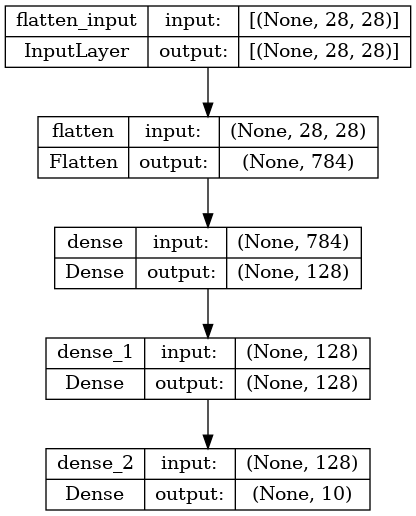

In [3]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with relu activation
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'default.png', show_shapes=True)

Training the model

In [4]:
# We compile the model using
# The stochastic gradient descent optimization algorithm Adam
# Sparse categorical crossentropy as our loss function

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)
model.save('default.model')

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1049 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0726 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9870


INFO:tensorflow:Assets written to: handwritten.model/assets


INFO:tensorflow:Assets written to: handwritten.model/assets


Evaluate model

313/313 [==============================] - 1s 1ms/step - loss: 0.0999 - accuracy: 0.9714
{'loss': [0.26181545853614807, 0.10489936172962189, 0.07258272171020508, 0.05340487137436867, 0.041187435388565063], 'accuracy': [0.923383355140686, 0.9675999879837036, 0.977066695690155, 0.9833833575248718, 0.9869666695594788]}


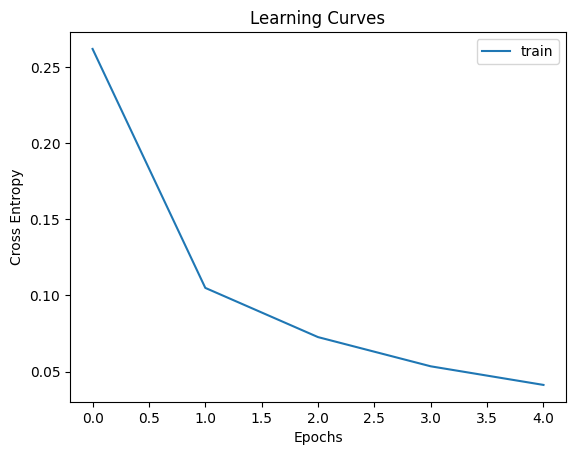

In [10]:
model = tf.keras.models.load_model('default.model')
loss, accuracy = model.evaluate(x_test,y_test)
print(history.history)
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

Changing activation function

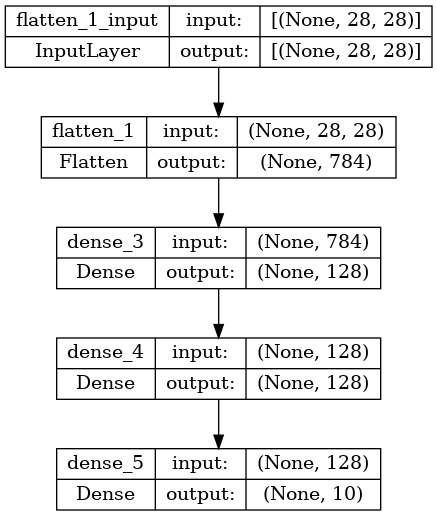

In [11]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with sigmoid activation
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'sigmoid.png', show_shapes=True)

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)
model.save('sigmoid.model')

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0560 - accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0396 - accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0168 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0137 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

INFO:tensorflow:Assets written to: sigmoid.model/assets


INFO:tensorflow:Assets written to: sigmoid.model/assets


313/313 [==============================] - 1s 1ms/step - loss: 0.0934 - accuracy: 0.9762
{'loss': [0.05596662685275078, 0.046705346554517746, 0.03956799581646919, 0.03386928141117096, 0.028016306459903717, 0.024235345423221588, 0.01928427815437317, 0.01676136627793312, 0.013676662929356098, 0.011360423639416695], 'accuracy': [0.9829999804496765, 0.9857500195503235, 0.9879999756813049, 0.9897333383560181, 0.9916499853134155, 0.9927833080291748, 0.994183361530304, 0.9954500198364258, 0.9965500235557556, 0.9969666600227356]}


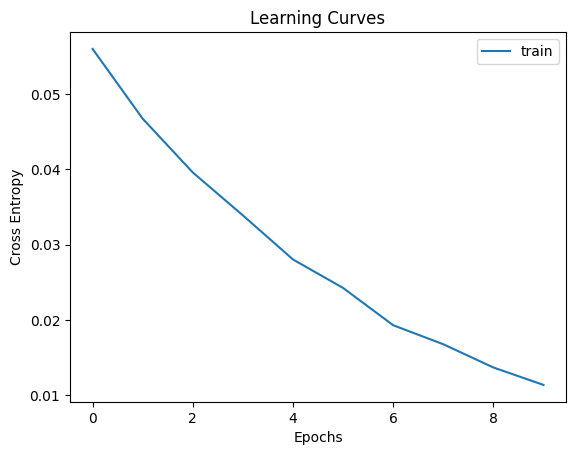

In [14]:
model = tf.keras.models.load_model('sigmoid.model')
loss, accuracy = model.evaluate(x_test,y_test)
print(history.history)
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

Decreasing neuron count

In [ ]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with sigmoid activation
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'neuron.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)
model.save('neuron.model')

In [ ]:
model = tf.keras.models.load_model('neuron.model')
loss, accuracy = model.evaluate(x_test,y_test)
print(history.history)
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

Changing optimizer

In [ ]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with relu activation
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'sgd.png', show_shapes=True)

In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)
model.save('sgd.model')

In [ ]:
model = tf.keras.models.load_model('sgd.model')
loss, accuracy = model.evaluate(x_test,y_test)
print(history.history)
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()